In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
dt = DecisionTreeClassifier()

In [3]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.

In [4]:
import pandas as pd
tennis_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/tennis.csv.txt')

In [5]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [6]:
feature_target = oe.fit_transform(tennis_data)

In [7]:

data = pd.DataFrame(feature_target, columns=['outlook','temp','humidity','windy','play'], dtype='int')

In [8]:
dt = DecisionTreeClassifier(max_depth=3)

In [9]:
dt.fit(data.drop(columns = ['play']),data.play)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
from sklearn.tree import export_graphviz

In [11]:
export_graphviz(dt,'dt-depth3.tree',feature_names=['outlook','temp','humidity','windy'])

### What is bias?
Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.
#### Bias
Fitting training data poorly, but produce similar result outside training data
we are building simple models that predicts terribly far from the reality but they don't change much from dataset to dataset.
Situation of underfitting.
a linear regression model would have high bias when trying to model a non-linear relationship.


### What is variance?
Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.

#### Variance
Building complex model that fits the training data well but many not work similar way of other dataset.
Model is not generalized & is overfitting.

### Bias Variance Tardeoff
* High Bias - Bad accuracy for training data as well testing data
* Low Bias - Good accuracy
* High Variance - Gap between training error & testing error is high. Generally complex models have high variance. Examples are - very small k in NearestNeighbours, max_depth very high or None in case of Decision Tree
* Increasing the accuracy of the model will lead to less generalization of pattern outside training data.
* Increasing the bias will decrease the variance.
* Increasing the variance will decrease the bias.
* We have to get perfect balance of bias & variance

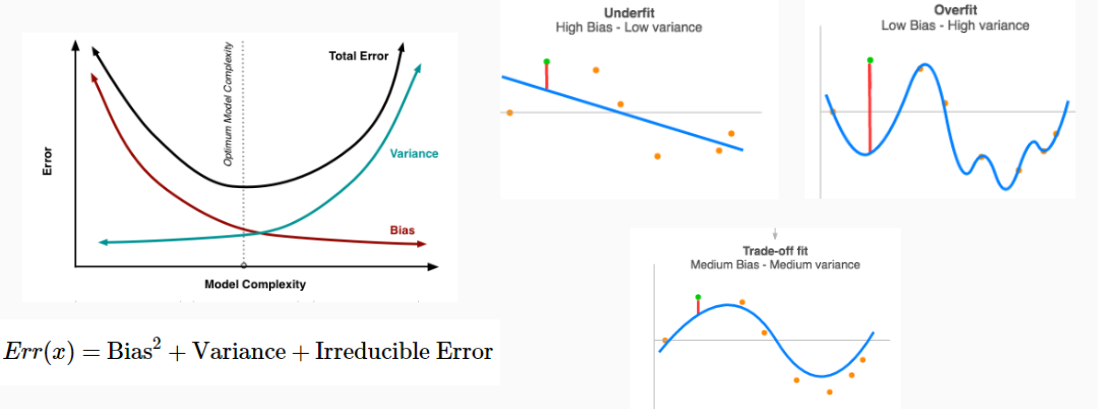

In [46]:
from sklearn.datasets import load_iris

In [47]:
iris = load_iris()

In [48]:
from sklearn.model_selection import train_test_split 

In [49]:
### Indentify the best value of max_depth(bias-variance tradeoff)

In [50]:
trainX, testX, trainY, testY  = train_test_split(iris.data,iris.target)

In [51]:
training_accuracy = []
testing_accuracy = []
for depth in [2,4,6,8,10,None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(trainX,trainY)
    training_accuracy.append(dt.score(trainX,trainY))
    testing_accuracy.append(dt.score(testX,testY))

In [52]:
training = pd.Series(data=training_accuracy, index=[2,4,6,8,10,'all'])

In [53]:
testing = pd.Series(data=testing_accuracy,index=[2,4,6,8,10,'all'])

In [54]:
df = pd.DataFrame({'Train':training,'Test':testing})

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

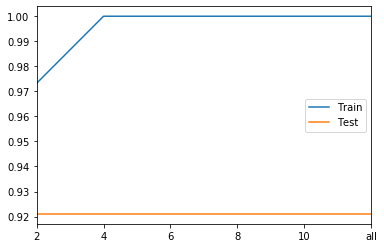

In [56]:
df.plot()

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
training_accuracy = []
testing_accuracy = []
for k in [2,4,6,8,10,15]:
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(trainX, trainY)
    training_accuracy.append(knc.score(trainX,trainY))
    testing_accuracy.append(knc.score(testX,testY))

In [60]:
training = pd.Series(data=training_accuracy, index=[2,4,6,8,10,15])
testing = pd.Series(data=testing_accuracy, index=[2,4,6,8,10,15])
df = pd.DataFrame({'Train':training, 'Test':testing})

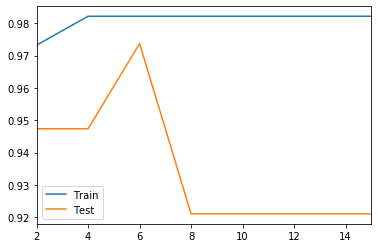

In [61]:
df.plot()

In [62]:
dt.feature_importances_

array([0.        , 0.01786284, 0.54995673, 0.43218043])

* Tells the importances of features
* Q. Important question will be in top of the tree or bottom of the tree
* A. Top
* Q. For Ordinal values, do you need one hot encoding
* A. No

In [63]:
dt.classes_

array([0, 1, 2])

In [64]:
dt.criterion

'gini'

In [65]:
dt.max_features_

4

In [66]:
from sklearn.datasets import load_breast_cancer

In [67]:
breast_cancer = load_breast_cancer()

In [69]:
df = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [70]:
df['target'] = breast_cancer.target

In [72]:
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
474,10.88,15.62,70.41,358.9,0.10070,0.10690,0.051150,0.015710,0.1861,0.06837,...,19.35,80.78,433.1,0.13320,0.38980,0.336500,0.07966,0.2581,0.10800,1
252,19.73,19.82,130.70,1206.0,0.10620,0.18490,0.241700,0.097400,0.1733,0.06697,...,25.59,159.80,1933.0,0.17100,0.59550,0.848900,0.25070,0.2749,0.12970,0
296,10.91,12.35,69.14,363.7,0.08518,0.04721,0.012360,0.013690,0.1449,0.06031,...,14.82,72.42,392.2,0.09312,0.07506,0.028840,0.03194,0.2143,0.06643,1
323,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.256500,0.150400,0.2569,0.06670,...,31.86,171.10,1938.0,0.15920,0.44920,0.534400,0.26850,0.5558,0.10240,0
401,11.93,10.91,76.14,442.7,0.08872,0.05242,0.026060,0.017960,0.1601,0.05541,...,20.14,87.64,589.5,0.13740,0.15750,0.151400,0.06876,0.2460,0.07262,1
333,11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,...,22.06,82.08,492.7,0.11660,0.09794,0.005518,0.01667,0.2815,0.07418,1
293,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,25.75,84.35,517.8,0.13690,0.17580,0.131600,0.09140,0.3101,0.07007,1
95,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,...,31.59,156.10,1750.0,0.11900,0.35390,0.409800,0.15730,0.3689,0.08368,0
491,17.85,13.23,114.60,992.1,0.07838,0.06217,0.044450,0.041780,0.1220,0.05243,...,18.42,127.10,1210.0,0.09862,0.09976,0.104800,0.08341,0.1783,0.05871,1
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.087770,0.023860,0.1349,0.06612,...,28.18,83.51,507.2,0.09457,0.33990,0.321800,0.08750,0.2305,0.09952,1


In [ ]:
plt.scatter(x=df['mean rad'])